In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV

from sklearn.pipeline import make_pipeline

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from scipy.stats import loguniform, uniform


# Problem 1. Geron Chapter 5, Exercise 10.
Train an SVM classifier on the wine
dataset, which you can load using sklearn.datasets.load wine().

This dataset contains the
chemical analyses of 178 wine samples produced by 3 different cultivators:

the goal is to
train a classification model capable of predicting the cultivator based on the wine’s chemical
analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to
classify all three classes. What accuracy can you reach?

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
wine = load_wine(as_frame=True)
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
wine.data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
wine.target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
wine.target.value_counts()

,count
target,
1,71
0,59
2,48


In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<Axes: title={'center': 'proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

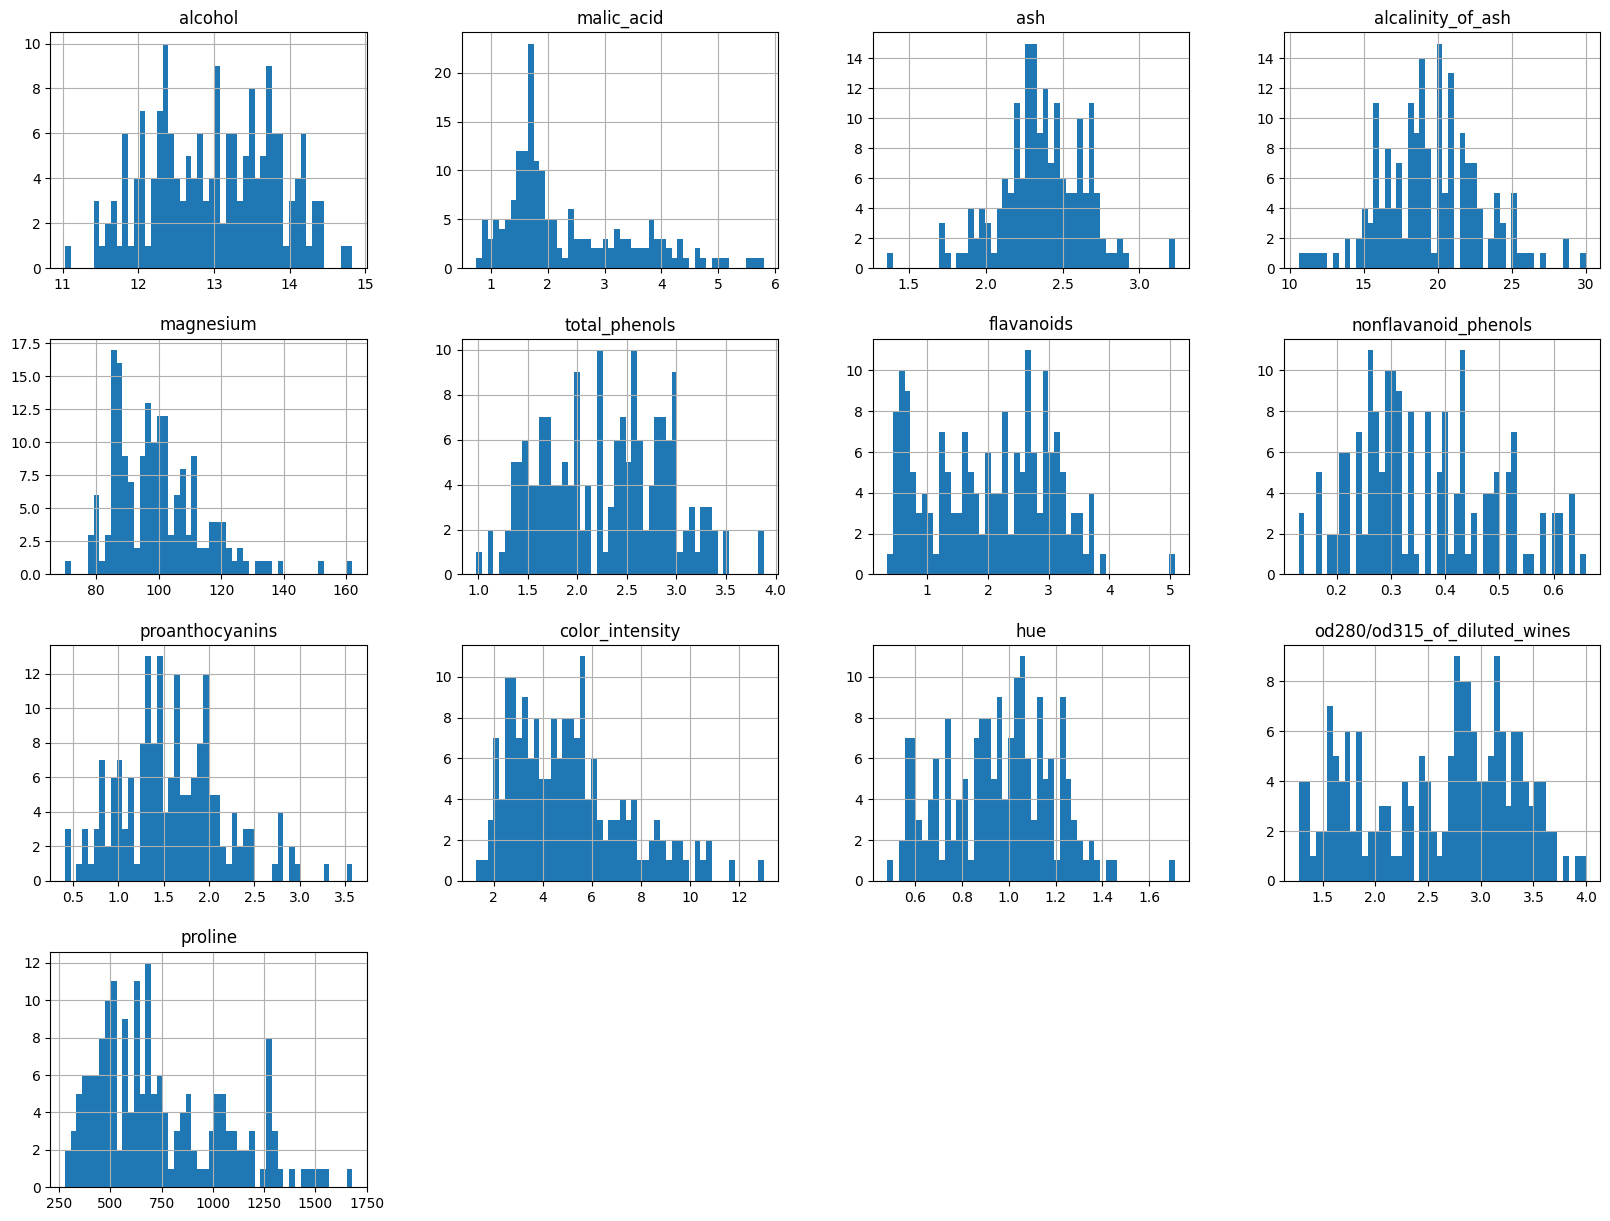

In [ ]:
wine.data.hist(bins=50, figsize=(20,15))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=8964)

In [ ]:
lin_clf = make_pipeline(StandardScaler(),
                        LinearSVC(dual=True, random_state=8964))

In [ ]:
cross_val_score(lin_clf, X_train, y_train).mean()

0.9788177339901478

In [ ]:
svm_clf = make_pipeline(StandardScaler(),
                        SVC(kernel="rbf",
                            random_state=8964))
cross_val_score(svm_clf, X_train, y_train).mean()

0.9788177339901478

In [ ]:
param_distrib = {
    "svc__gamma": loguniform(0.001, 0.1),
    "svc__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distrib, n_iter=100, cv=5,
                                   random_state=42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1.5808361216819946, gamma=0.05399484409787434,
                     random_state=8964))])

In [ ]:
rnd_search_cv.best_score_

0.9859605911330049

In [ ]:
rnd_search_cv.score(X_test, y_test)

0.9722222222222222

# Problem 2. Geron, Chapter 6, Exercise 7.
Train and fine-tune a decision tree for
the moons dataset by following these steps:
1. Use make moons(n samples=10000, noise=0.4) to generate a moons dataset.
2. Use train test split() to split the dataset into a training set and a test set.
3. Use grid search with cross-validation (with the help of the GridSearchCV class) to
find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for
max leaf nodes.
4. Train it on the full training set using these hyperparameters, and measure your model’s
performance on the test set. You should get roughly 85% to 87% accuracy.

In [ ]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=8964)

In [ ]:
moons = pd.DataFrame(np.hstack([X_moons, y_moons.reshape(-1, 1)]), columns=['x1', 'x2', 'y'])
moons.head()

,x1,x2,y
0,-1.103091,0.491258,0.0
1,0.637539,0.105942,0.0
2,-0.480858,0.055791,0.0
3,2.107739,0.020898,1.0
4,1.872960,-0.624407,1.0


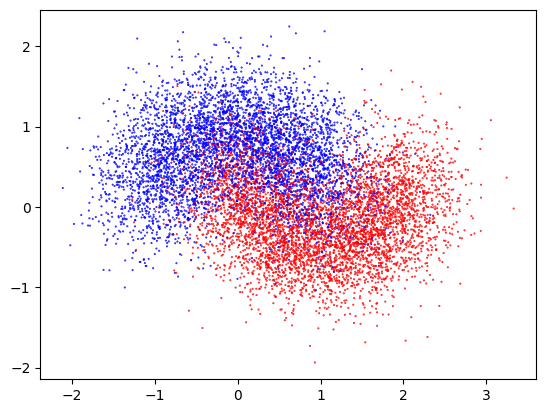

In [ ]:
plt.scatter(moons.x1, moons.x2, s=0.2, c=moons.y.values, cmap='bwr',
            # clim=[-1, 2]
            )

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=8964)

In [ ]:
params = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=8964),
                              params,
                              cv=3)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=8964),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=18, random_state=8964)

In [ ]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8795